In [17]:
pip install odfpy

In [18]:
import pandas as pd
from google.colab import files

# Ensuring odfpy is installed
!pip install odfpy

# Uploading the ODS file
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
# Loading the dataset into a DataFrame
butterfly_data = pd.read_excel(file_name, engine='odf')

# Checking the first few rows
print(butterfly_data.head())



Saving Butterfly_Data.ods to Butterfly_Data (1).ods
   number         Country  Number of species    area  latitude  island
0       1         Austria                197   83858     48.20       0
1       2         Belgium                 88   30510     50.85       0
2       3        Bulgaria                211  110994     42.68       0
3       4          Cyprus                 48    9251     35.17       1
4       5  Czech Republic                140   78866     50.08       0


number               0
Country              0
Number of species    0
area                 0
latitude             0
island               0
dtype: int64
          number  Number of species          area   latitude     island
count  45.000000          45.000000  4.500000e+01  45.000000  45.000000
mean   23.000000         354.977778  4.410486e+05  35.935333   0.177778
std    13.133926         386.568910  1.224537e+06  17.633581   0.386646
min     1.000000          18.000000  3.160000e+02   2.000000   0.000000
25%    12.000000         110.000000  4.449300e+04  22.400000   0.000000
50%    23.000000         196.000000  1.098840e+05  40.420000   0.000000
75%    34.000000         428.000000  3.126850e+05  50.850000   0.000000
max    45.000000        1593.000000  7.692000e+06  60.170000   1.000000


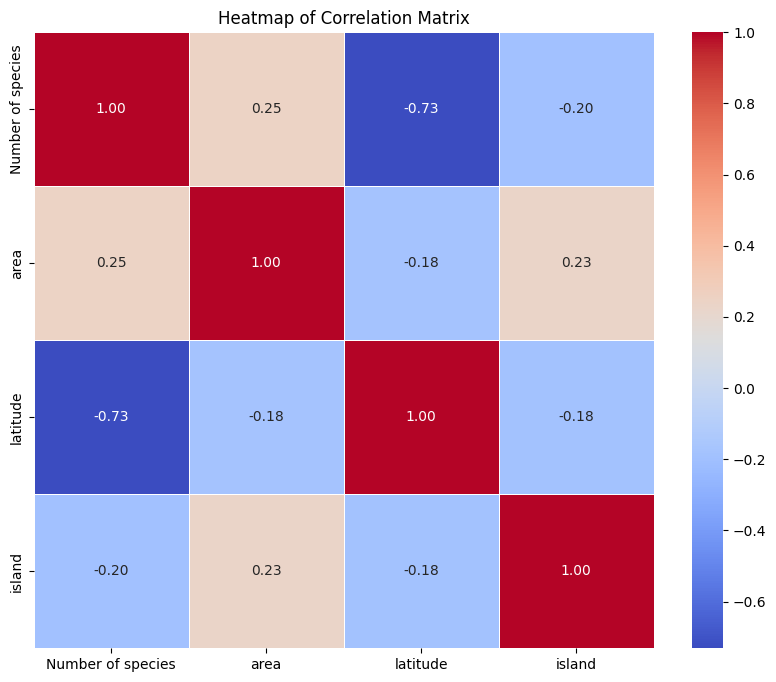

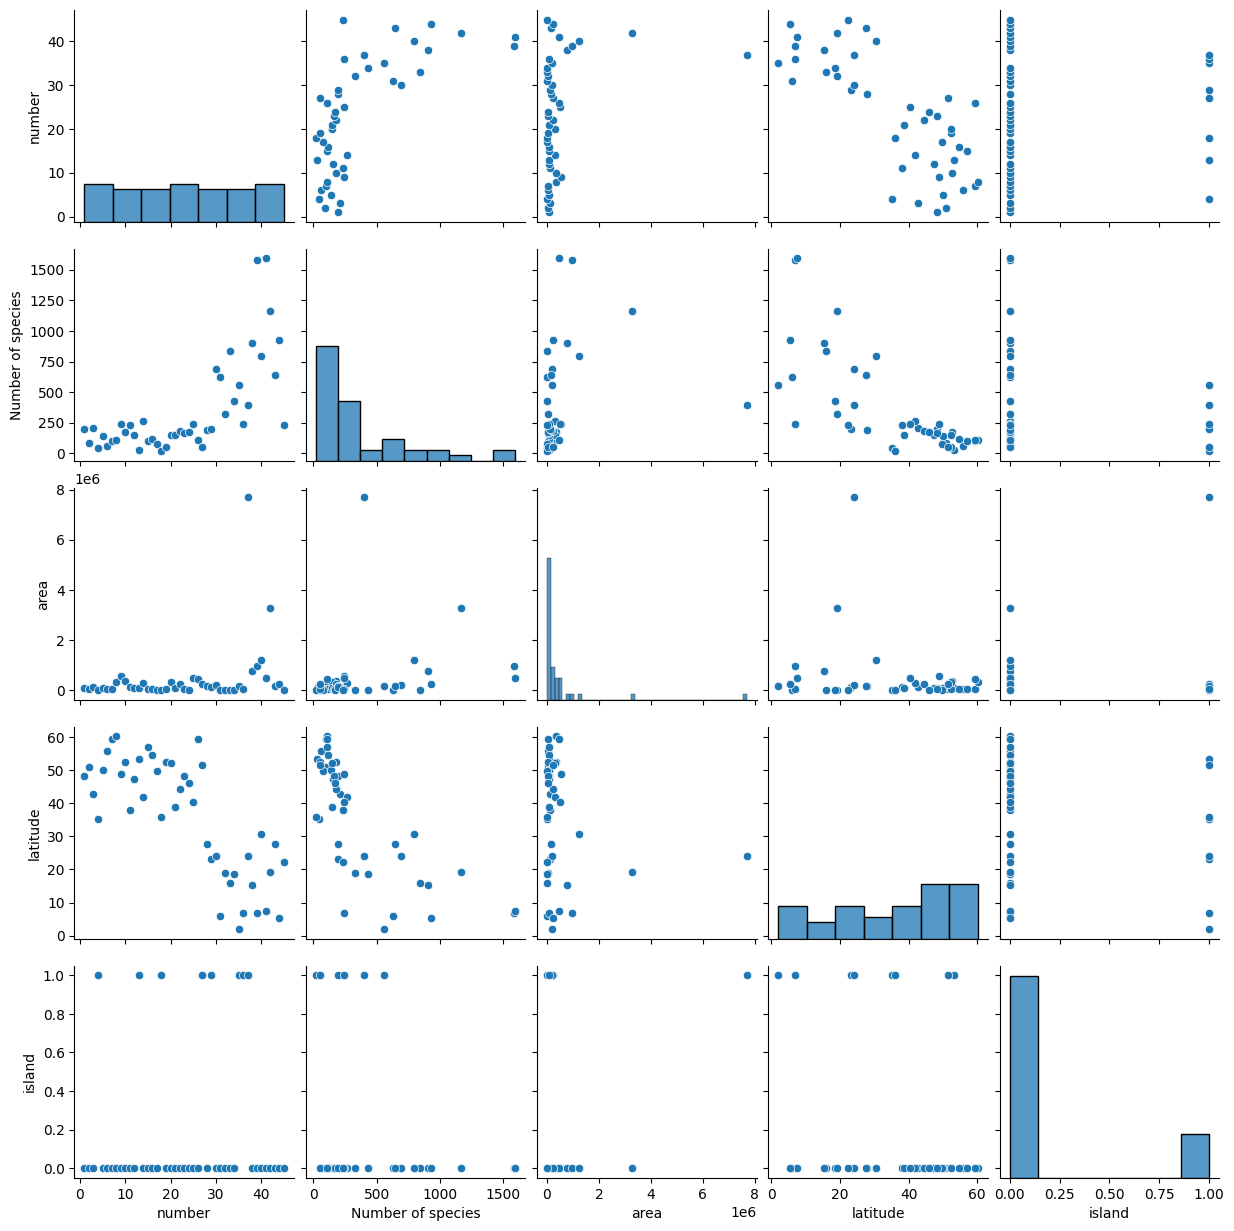

In [19]:
# Checking for missing values
print(butterfly_data.isnull().sum())

# Basic statistics
print(butterfly_data.describe())

# Generating a heatmap of the correlation matrix

numerical_features = butterfly_data.select_dtypes(include=[float, int])
numerical_features = numerical_features.drop('number', axis=1)

# Calculating the correlation matrix
correlation_matrix = numerical_features.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


# Data visualization for insights 
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(butterfly_data)
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for PCA
features = butterfly_data.select_dtypes(include=[float, int])
features = features.drop('number', axis=1)

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [21]:
from sklearn.decomposition import PCA

# Choosing the number of components for PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Converting to a DataFrame for better visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


In [22]:
from sklearn.cluster import KMeans

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(pca_df)

# Adding cluster information to the DataFrame
pca_df['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


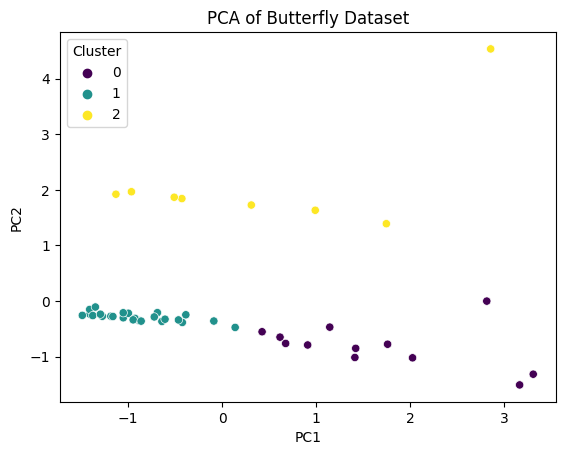

[0.46168017 0.30225459]


In [23]:
# Visualizing the PCA results
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA of Butterfly Dataset')
plt.show()

# Explaining variance ratio
print(pca.explained_variance_ratio_)
